# Gradient Descent

- In each step, take steps proportional to the negative of the gradient vector of the function at the current point $w^t$:

  $$
  w^{t+1} = w^t - \eta \nabla J(w^t)
  $$

- $J(w)$ decreases fastest if one goes from $w^t$ in the direction of $-\nabla J(w^t)$.
- **Assumption**: $J(w)$ is defined and differentiable in a neighborhood of a point $w^t$.
- **Gradient ascent** takes steps proportional to (the positive of) the gradient to find a local maximum of the function.
- Continue to find:

  $$
  w^* = \arg\min_w J(w)
  $$

# Gradient Descent (cont.)

- **Minimize** $J(w)$

  $$
  w^{t+1} = w^t - \eta \nabla_w J(w^t)
  $$

  $$
  \nabla_w J(w) = \begin{bmatrix}
  \frac{\partial J(w)}{\partial w_1} \\
  \vdots \\
  \frac{\partial J(w)}{\partial w_d}
  \end{bmatrix}
  $$

- If $\eta$ is small enough, then $J(w^{t+1}) \leq J(w^t)$.
- $\eta$ can be allowed to change at every iteration as $\eta_t$.

# Local Minima Problem

- **Local minima problem**
- However, when $J$ is convex, all local minima are also global minima $\Rightarrow$ gradient descent can converge to the global solution.

# Weight Update Rule

- Weight update rule having $h_w(x) = w^T x$ is as follows:

-- Gradient descent:
  $$
  w^{t+1} = w^t - \eta \sum_{i=1}^{n} \left( y^{(i)} - w^T x^{(i)} \right) x^{(i)}
  $$

-- Gradient ascent:
  $$
  w^{t+1} = w^t + \eta \sum_{i=1}^{n} \left( y^{(i)} - w^T x^{(i)} \right) x^{(i)}
  $$

- $\eta$: too small $\Rightarrow$ gradient descent can be slow.
- $\eta$: too large $\Rightarrow$ gradient descent can overshoot the minimum. It may fail to converge, or even diverge.

$$
\text{learning rate} = \alpha
$$

## Types of Gradient Descent

### Batch Gradient Descent
- **Definition**: Processes the entire training set in one iteration.
  - **Pros**: Provides a stable convergence path.
  - **Cons**: Can be computationally costly for large datasets and practically impossible for some applications (such as online learning).

### Mini-batch Gradient Descent
- **Definition**: Processes small, random subsets (mini-batches) of the training set in each iteration.
  - **Pros**: Balances the efficiency of batch gradient descent with the speed of stochastic gradient descent.

### Stochastic Gradient Descent (SGD)
- **Definition**: Processes one training example per iteration.
  - **Pros**: Updates the model parameters more frequently, which can lead to faster convergence.
  - **Cons**: Can cause the cost function to fluctuate, making it harder to converge to the exact minimum.

### Example: Linear Regression with SSE Cost Function

- **Cost Function**: The Sum of Squared Errors (SSE) is used as the cost function for linear regression.

  $$
  J(w) = \sum_{i=1}^{n} J^{(i)}(w)
  $$

  $$
  J^{(i)}(w) = \left( y^{(i)} - w^T x^{(i)} \right)^2
  $$

- **Gradient Descent Update Rule**:

  $$
  w^{t+1} = w^t - \eta \nabla_w J^{(i)}(w)
  $$

  - **Derivation**:
    - The gradient of the cost function with respect to the weights is:

      $$
      \nabla_w J^{(i)}(w) = -2 \left( y^{(i)} - w^T x^{(i)} \right) x^{(i)}
      $$

    - Substituting this into the update rule gives:

      $$
      w^{t+1} = w^t + \eta \left( y^{(i)} - w^T x^{(i)} \right) x^{(i)}
      $$

- **Explanation**: In this context, $x^{(i)}$ indicates the $i$'th observation.

## Stochastic Gradient Descent Insights

- **Convergence**: Often, stochastic gradient descent gets close to the minimum much faster than batch gradient descent.
- **Oscillation**: It may never converge to the minimum, and the parameters will keep oscillating around the minimum of the cost function.
  - **Practical Note**: Most of the values near the minimum will be reasonably good approximations to the true minimum.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the plot style to dark background
plt.style.use('dark_background')

In [2]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

In [3]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    Y = true_slope * X + true_intercept + noise
    return X, Y


In [4]:
# MSE cost function
def cost_function(X, Y, w):
    return np.sum((h_w(X, w) - Y)**2) / len(X)

In [5]:
# Gradient descent
def gradient_descent(X, Y, w, alpha, num_iters):
    m = len(X)
    cost_history = []
    w_history = [w.copy()]

    for i in range(num_iters):
        # updates
        gradient_w0 = np.sum(h_w(X, w) - Y) / m
        gradient_w1 = np.sum((h_w(X, w) - Y) * X) / m
        w[0] -= alpha * gradient_w0
        w[1] -= alpha * gradient_w1

        cost_history.append(cost_function(X, Y, w))
        w_history.append(w.copy())  # Store a copy of w, not the reference

    return w, cost_history, w_history


In [6]:
# Create cost function surface for visualization
def create_cost_surface(X, Y, w0_range, w1_range):
    w0_vals = np.linspace(w0_range[0], w0_range[1], 50)
    w1_vals = np.linspace(w1_range[0], w1_range[1], 50)
    w0_mesh, w1_mesh = np.meshgrid(w0_vals, w1_vals)
    
    J_vals = np.zeros(w0_mesh.shape)
    for i in range(w0_mesh.shape[0]):
        for j in range(w0_mesh.shape[1]):
            J_vals[i, j] = cost_function(X, Y, [w0_mesh[i, j], w1_mesh[i, j]])
    
    # Apply logarithmic transformation to cost values
    log_J_vals = np.log10(J_vals + 1e-10)  # Add small constant to avoid log(0)
    
    return w0_mesh, w1_mesh, log_J_vals


In [7]:
# Generate data
X, Y = generate_data(n=50, noise=5.0)
w_initial = [0, 0]  # Start with w0 = 0, w1 = 0
eta = 0.05  # Learning rate
num_iters = 100  # Number of iterations

# Run gradient descent
w_final, cost_history, w_history = gradient_descent(X, Y, w_initial.copy(), eta, num_iters)

# Create cost surface for visualization
w0_range = [-10, 20]
w1_range = [-1, 5]
w0_mesh, w1_mesh, log_J_vals = create_cost_surface(X, Y, w0_range, w1_range)

Final weights: w0 = 6.8319, w1 = 2.8550
Final cost: 20.6302
True values were: intercept = 8, slope = 3


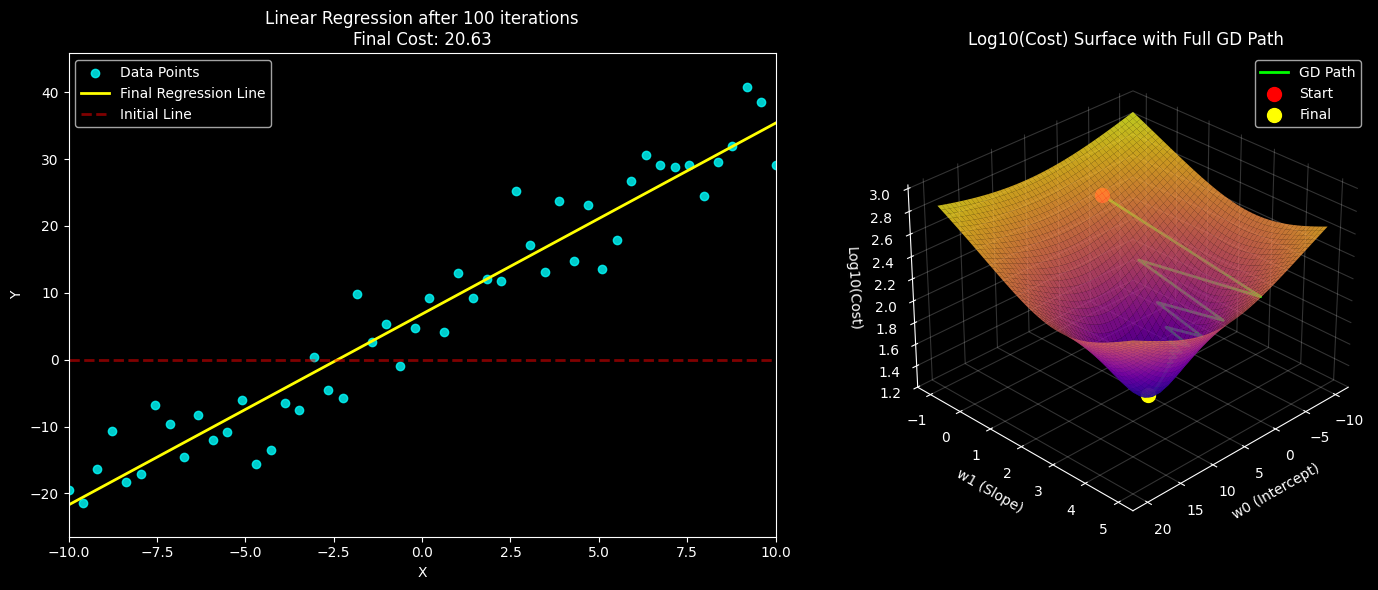

In [8]:
# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))
fig.patch.set_facecolor('black')  # Set figure background to black

ax1 = fig.add_subplot(121)  # Data and regression line
ax2 = fig.add_subplot(122, projection='3d')  # Cost surface

# Set both subplot backgrounds to black
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Set the color of the pane in 3D subplot
ax2.xaxis.set_pane_color((0, 0, 0, 0.8))
ax2.yaxis.set_pane_color((0, 0, 0, 0.8))
ax2.zaxis.set_pane_color((0, 0, 0, 0.8))

# Set grid color in 3D subplot
ax2.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.2)
ax2.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.2)
ax2.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0.2)

# Set up data subplot
ax1.scatter(X, Y, color='cyan', alpha=0.8, label='Data Points')

# Plot the final regression line
ax1.plot(X, h_w(X, w_final), color='yellow', lw=2, label='Final Regression Line')

# Plot the initial regression line for comparison
ax1.plot(X, h_w(X, w_initial), color='red', lw=2, alpha=0.5, linestyle='--', label='Initial Line')

title1 = ax1.set_title(f'Linear Regression after {num_iters} iterations\nFinal Cost: {cost_history[-1]:.2f}', color='white', fontsize=12)
ax1.set_xlim(min(X), max(X))
ax1.set_ylim(min(Y) - 5, max(Y) + 5)
ax1.set_xlabel('X', color='white')
ax1.set_ylabel('Y', color='white')
ax1.tick_params(colors='white')
ax1.legend()

# Set up cost surface subplot
surf = ax2.plot_surface(w0_mesh, w1_mesh, log_J_vals, cmap='plasma', alpha=0.8)

# Plot the entire gradient descent path
w0_path = [w[0] for w in w_history]
w1_path = [w[1] for w in w_history]
log_cost_path = [np.log10(cost_function(X, Y, w) + 1e-10) for w in w_history]

# Plot the gradient descent path
ax2.plot(w0_path, w1_path, log_cost_path, color='lime', lw=2, label='GD Path')

# Highlight starting point
ax2.scatter([w_initial[0]], [w_initial[1]], [np.log10(cost_function(X, Y, w_initial) + 1e-10)], 
           color='red', s=100, label='Start')

# Highlight ending point
ax2.scatter([w_final[0]], [w_final[1]], [np.log10(cost_function(X, Y, w_final) + 1e-10)], 
           color='yellow', s=100, label='Final')

title2 = ax2.set_title('Log10(Cost) Surface with Full GD Path', color='white', fontsize=12)
ax2.set_xlabel('w0 (Intercept)', color='white')
ax2.set_ylabel('w1 (Slope)', color='white')
ax2.set_zlabel('Log10(Cost)', color='white')
ax2.tick_params(colors='white')

# Set the view angle for better visualization
ax2.view_init(elev=30, azim=45)

# Legend for 3D plot
ax2.legend()

plt.tight_layout()

# Print the final result
print(f"Final weights: w0 = {w_final[0]:.4f}, w1 = {w_final[1]:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")
print(f"True values were: intercept = 8, slope = 3")

plt.show()


### **Hint**: 

##### You can see an amazing **animation** of these codes in the file with a similar name but with a .py extension. This will help you understand clearly what happens in this method.
